# Práctica 1: Introducción a Señales

In [1]:
# Imports

%matplotlib widget

import ipywidgets as widgets
import matplotlib.pyplot as plt
import math
import numpy as np

# Funciones auxiliares

def plot(t, x):
    plt.figure()
    plt.stem(t,x)
    plt.show()



## Ejercicio 1
 Escriba funciones que permitan generar las siguientes señales discretas

Una senoidal que responda a la ecuación y[n] = sen(2πfst+φ), donde t es la variable de tiempo discreto, con paso 1/fm, fm ∈ R es la frecuencia de muestreo, fs ∈ R es la frecuencia de la senoidal y φ ∈ (−π, π) su fase

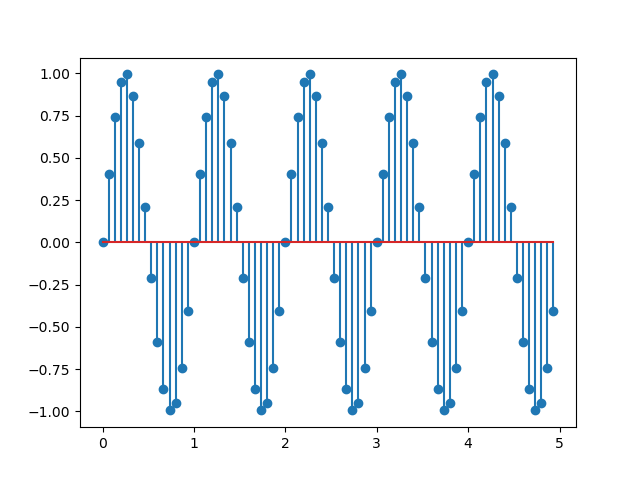

In [17]:
def senoidal(fm, fs, phi, tini, tfin): 
    Tm = 1/fm
    t = np.arange(tini, tfin, Tm)
    x = np.sin(2*math.pi*fs*t + phi) 
    return x, t

x, t = senoidal (15, 1, 0, 0, 5)
plt.close('all'); plt.figure('señal senoidal'); plt.stem(t, x); plt.show()


Una señal sinc, definida como

$ sinc(t)= \left\{ \begin{array}{lcc}
             \frac{\sin(x)}{x} &   si  & x \not= 0 \\
             1 &   si  & x = 0 \\
             \end{array}
   \right.
$

considerando $ x = 2 \pi f_s t $ , con f_S ∈ R y t ∈ (−1, 1).

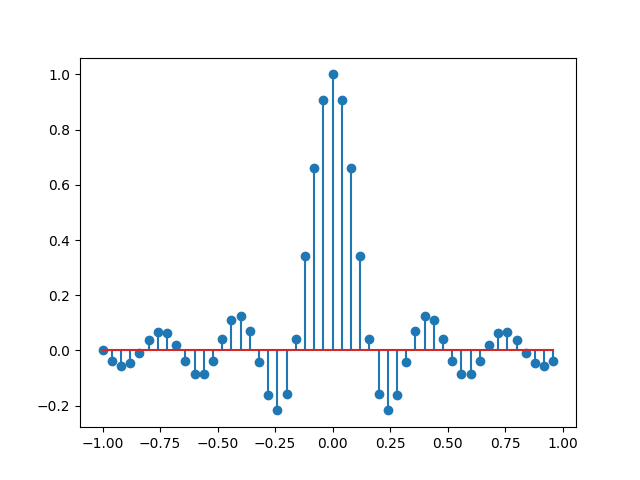

In [4]:
def sinc(fm, fs, phi, tini, tfin): 
    Tm = 1/fm
    t = np.arange(tini, tfin, Tm)
    x = 2*math.pi*fs*t+phi
    idx_noceros = np.where(np.abs(x)>1e-5)
    y = np.ones(len(x))
    y[idx_noceros] = np.sin(x[idx_noceros]) / x[idx_noceros]
    return y, t
#Esto es un comentario de prueba 
#Esto es otro comentario

x_sinc, t_sinc = sinc(25, 3, 0, -1, 1)
plt.close('all'); plt.figure('señal sinc'); plt.stem(t_sinc, x_sinc); plt.show()

Una onda cuadrada, que puede definirse de la siguiente manera:
$ c(t)= \left\{ \begin{array}{lcc}
             -1 &   si  & mod(2 \pi f_s t + \phi, 2 \pi) & x \geq \pi \\
             1 &   si  & mod(2 \pi f_s t + \phi, 2 \pi) & x < \pi \\
             \end{array}
   \right.
$

donde t es la variable de tiempo discreto desde 0 hasta 1 segundo, con paso $1/fm, fm \in \Re$ es la frecuencia de muestreo, $ f_s \in \Re$ es la frecuencia de la senoidal y $ \phi \in (-\pi, \pi) $ su fase.

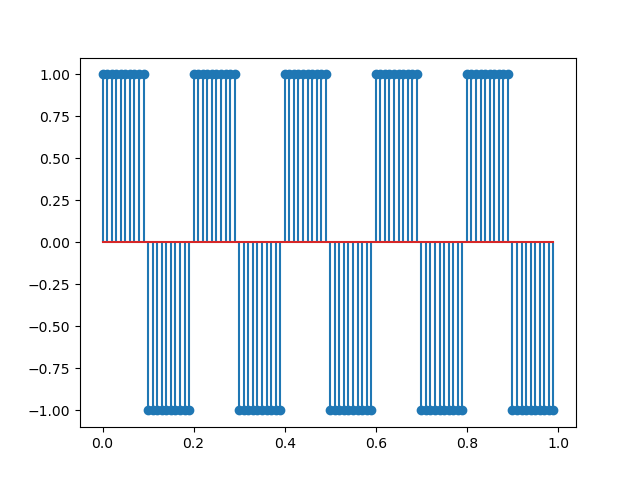

In [19]:
def cuadrada(fm, fs, phi, tini, tfin):
  Tm = 1/fm
  t = np.arange(tini, tfin, Tm)  
  cond = np.mod(2*math.pi*fs*t+phi, 2*math.pi)
  idx_noceros = np.where(cond>= math.pi)
  y = np.ones(len(t))
  y[idx_noceros] = -1
  return t, y

plt.close('all')
t, y = cuadrada(100, 5, 0, 0, 1)
plt.figure('onda cuadrada'); plt.stem(t, y); plt.show()

Las tres funciones deben permitir elegir el intervalo de tiempo que se desea muestrear, definido desde $ t_{inicial} $ a $ t_{final} $. Una vez generadas estas funciones, pruebelas utilizando una frecuencia de muestreo de 100 Hz, un intervalo de
tiempo de [0; 1] y distintos valores para la $f_s$ y la fase $ \phi $. Respete la relación $ 2f_s \geq f_m$ para determinar los valores de las frecuencias.

## Ejercicio 2
Realice las siguientes operaciones básicas sobre una señal senoidal:

1. inversión (sobre t)

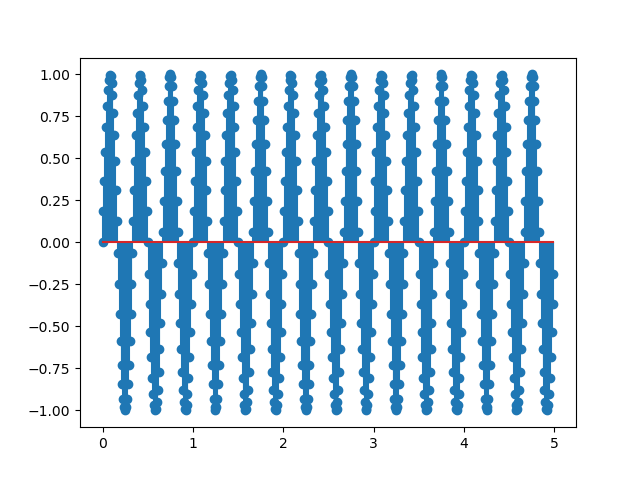

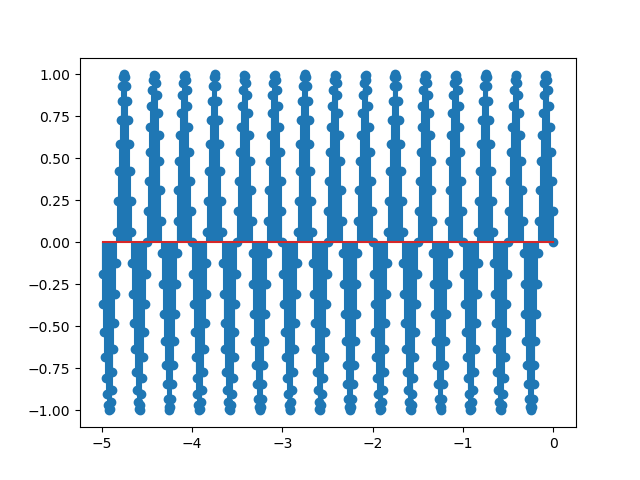

In [20]:
def inversion(y, t):
    t = -t
    return t, y

plt.close('all')
x, t = senoidal (100, 3, 0, 0, 5)
plt.figure('señal original'); plt.stem(t, x); plt.show()
t_2, x_2 = inversion(x, t)
plt.figure('señal invertida con respecto a t'); plt.stem(t_2, x_2); plt.show()

2. rectificación

De media onda: los valores negativos se vuelven 0

De onda completa: los valores negativos se vuelven el valor absoluto de ese valor

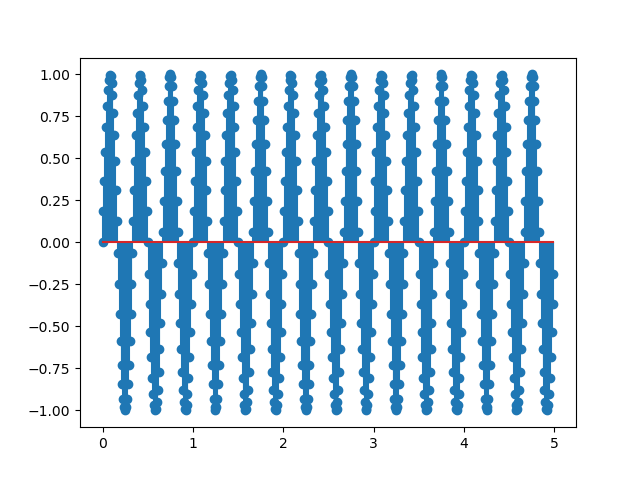

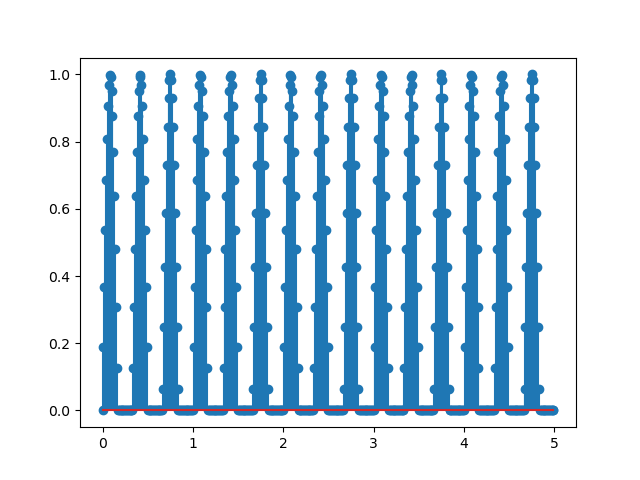

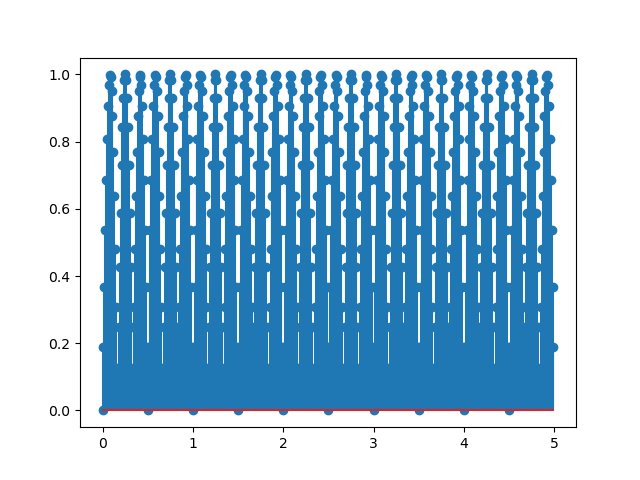

In [21]:
def rect_media_onda(y):
    idx_negativos = np.where(y<0)
    y_rect = y
    y_rect[idx_negativos] = 0
    return y_rect

def rect_onda_completa(y):
    idx_negativos = np.where(y<0)
    y[idx_negativos] = np.abs(y[idx_negativos])
    return y

plt.close('all')

sen, t = senoidal (100, 3, 0, 0, 5)
plt.figure('señal original'); plt.stem(t,sen); plt.show()
x_2 = rect_media_onda(sen)
plt.figure('rectificación de media onda'); plt.stem(t, x_2); plt.show()

sen, t = senoidal (100, 3, 0, 0, 5)
x_3 = rect_onda_completa(sen)
plt.figure('rectificación de onda completa'); plt.stem(t, x_3); plt.show()

3. cuantización en 8 niveles

$ p(t)= \left\{ \begin{array}{lcc}
             0 & \   \text{si}  & x < 0 \\
              H int(x/H) & \   \text{si}  & 0 \leq x < (N-1)H \\
             (N-1)H & \ \text{si} & x \geq (N-1)H 
             \end{array}
   \right.
$

donde N es el numero de niveles de la cuantizacion, y H es la magnitud del cuanto o paso. 

para la señal senoidal, que tiene parte negativa, el metodo debe adaptarse. Una forma sencilla de realizar esto es hacer la señal toda positiva (restando el minimo), aplicar la formula anterior, y luego sumar el minimo para volver a dejar la
señal en el rango de valores original


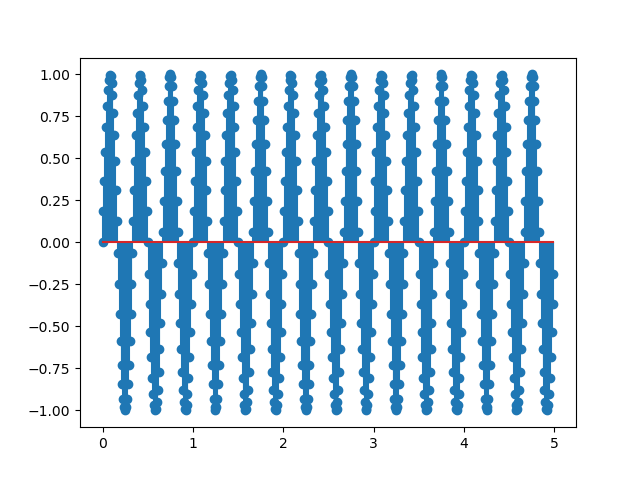

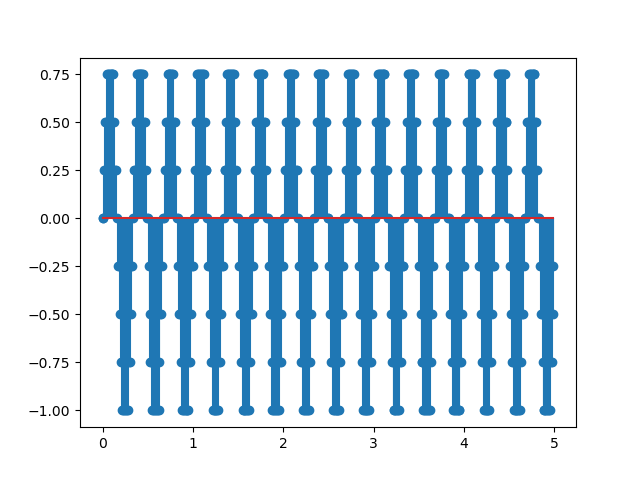

In [22]:
def cuantizacionN (y, N):
#n son los niveles de cuantizacion

    ynuevo=y-np.min(y)
    H=np.max(ynuevo)/N
    cuant=ynuevo

    #de acuerdo a qué valor de y me encuentre le asigno los distintos valores a cuant
    idx_menor_0 = np.where(ynuevo<0)
    idx_medio = np.where(np.logical_and(ynuevo>=0, ynuevo<(N-1)*H))
    idx_mayor = np.where(ynuevo>=(N-1)*H)

    cuant[idx_menor_0] = 0
    cuant[idx_medio] = H * np.fix(ynuevo[idx_medio]/H)
    cuant[idx_mayor] = (N-1) * H

    #sumo el minimo para volver a tener el rango original
    cuanti=cuant+min(y)
    return cuanti

plt.close('all')
sen, t = senoidal (100, 3, 0, 0, 5)
plt.figure('señal original'); plt.stem(t,sen); plt.show()

sen_cuant = cuantizacionN(sen, 8)
plt.figure('señal cuantizada en 8 niveles'); plt.stem(t,sen_cuant); plt.show()


## Ejercicio 3
A partir del analisis de dicha grafica, determine los valores numericos (y unidades correspondientes) de amplitud (A), fase (phi), frecuencia (fs) y periodo de muestreo (Tm).

Para detrminar el valor de la fase tenga en cuenta la relación $$ \phi = −2 \phi f_s t_1 $$, donde t1 indica el retardo temporal en segundos (en este caso el retardo temporal se puede determinar encontrando el primer cruce por cero de la sinusoidal).

![title](img/senoidal_ej3_guia1.png)



Nro muestras total en un periodo = 40

A = 3

Ts = 0.05 s

fs = 1 / 0.05 = 20 Hz

Tm = Ts/nro muestras en un periodo = 0.00125 s

t1 = Tm * 6 (muestras hasta 0 sin contar el 0) = 0.0075 s

phi =  - 2 * pi * fs * t1 rad

fase:  -0.7853981633974483


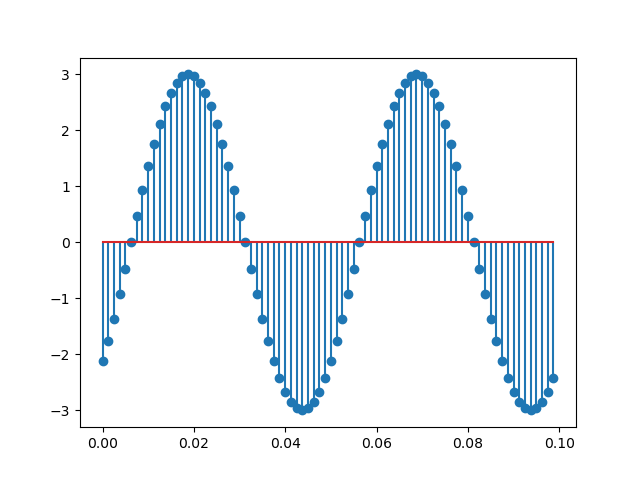

In [23]:
A = 3
fs = 20
tini = 0; Tm = 0.00125 ; tfin = 0.1
t = np.arange(tini, tfin, Tm) 
t1 = t[5]
phi = -2*math.pi*fs*t1
print('fase: ', phi)
x = A * np.sin(2* math.pi * 20 * t + phi)
plt.close('all'); plt.figure('señal'); plt.stem(t, x); plt.show()


## Ejercicio 4

Genere y grafique una señal senoidal discreta con frecuencia 5 Hz y duracion 1 seg. Para ello utilice las siguientes frecuencias de muestreo: 100, 25, 10, 4, 1 y 0,5 Hz. Analice el resultado.

¿En qué casos la cantidad de ciclos
que observa se corresponde con una sinusoidal de 5 Hz? ¿A que se deben las discrepancias encontradas?

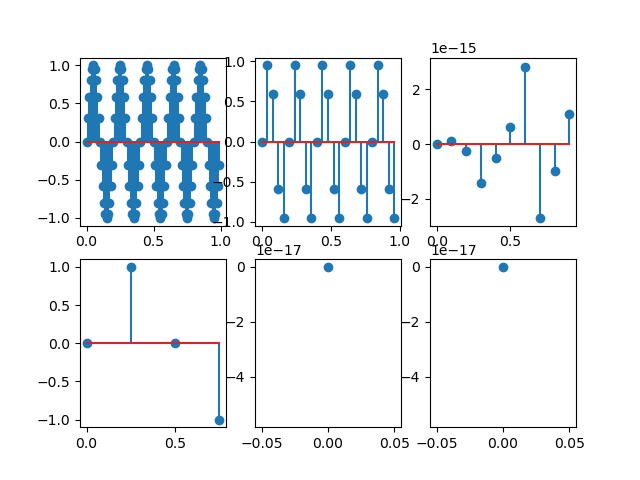

In [24]:
fig, axs = plt.subplots(2, 3)

sen1, t = senoidal (100, 5, 0, 0, 1)
axs[0, 0].stem(t,sen1)

sen2, t = senoidal (25, 5, 0, 0, 1)
axs[0, 1].stem(t,sen2)

sen3, t = senoidal (10, 5, 0, 0, 1)
axs[0, 2].stem(t,sen3)

sen4, t = senoidal (4, 5, 0, 0, 1)
axs[1, 0].stem(t,sen4)

sen5, t = senoidal (1, 5, 0, 0, 1)
axs[1, 1].stem(t,sen5)

sen6, t = senoidal (0.5, 5, 0, 0, 1)
axs[1, 2].stem(t,sen6)
plt.show()

In [11]:
# figura 3
np.sin(2*5*0.5*math.pi)

6.123233995736766e-16

Las discrepancias corresponden a los casos en que no se respeta la relación entre la frecuencia de muestreo y la frecuencia de la señal, y por consiguiente no se cuenta con la información necesaria para reconstruir la señal.

En la figura 3, todos los valores son muy cercanos a 0 dado que se aplica el seno a múltiplos de $\pi$ debido al espaciado elegido por el periodo de muestreo 1/10 = 0.1

En la figura 4, el periodo de muestreo es 0.25 entonces se calcula el seno a 0, y multiplos de $\pi / 2$, $\pi$ y $3\pi/2$, y por eso tenemos valores 0-1-0--1

## Ejercicio 5
Genere y grafique una señal senoidal con frecuencia 4000 Hz y duracion 2 seg., utilizando una frecuencia de muestreo de 129 Hz. Grafique el resultado y estime la frecuencia de la onda sinusoidal que se observa en la figura. Analice y obtenga conclusiones.

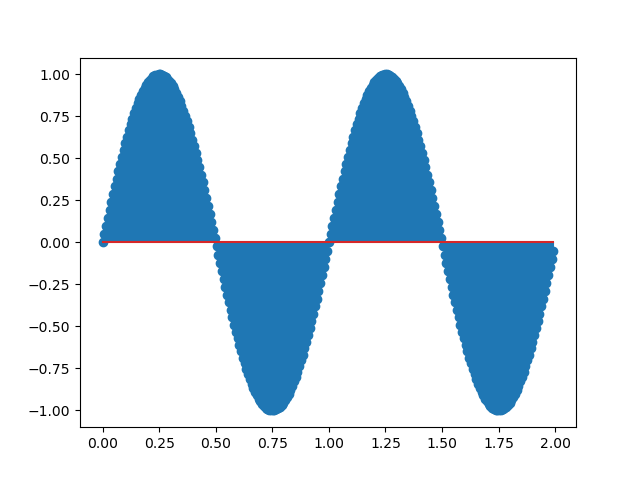

In [25]:
sen1, t = senoidal (129, 4000, 0, 0, 2)
plot(t,sen1)

Se observa una señal de frecuencia 1 Hz la cual no es de la frecuencia de la señal original. Esto se debe al fenómeno de alias, por el cual se observa que hay frecuencias que no existían en la señal original que ahora se observan dado que no se respeta el teorema del muestreo.

## Ejercicio 6
Genere una señal discreta con frecuencia de muestreo de 10 Hz y sobremuestreela, mediante distintos tipos de interpoladores, a 4 veces la frecuencia de muestreo. Para esto, implemente la siguiente ecuacion de interpolacion:

$$
 x_i(m T_i) = \sum_{i=1}^{n} x (nT) I( \frac{mT_i }{T} - n)
$$


donde $I$ es la funcion interpolante (la funcion sinc, por ejemplo). Observe que $T$ representa el periodo de muestreo original y $T_i$ el nuevo periodo de muestreo. Note ademas que $n$ y $m$ indican el numero de muestra en la señal original e interpolada, respectivamente y que, si bien aqui se expresan como señales analógicas, $x$ y $x_i$ serán señales discretas en su implementación (es decir, $x_i$[m] y $x[n]$ ). Para la funcion sinc tenga en cuenta la definición dada en el primer ejercicio, con fs = 0,5.

n = numero de muestras viejo
m = numero de muestras nuevo

In [13]:
plt.close('all')

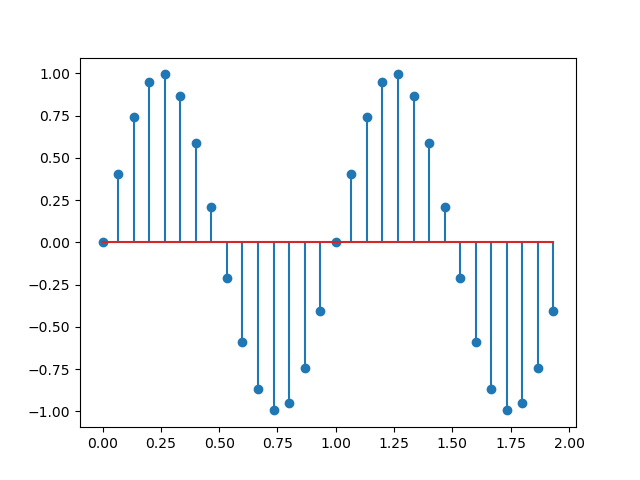

m: 120 - n: 30


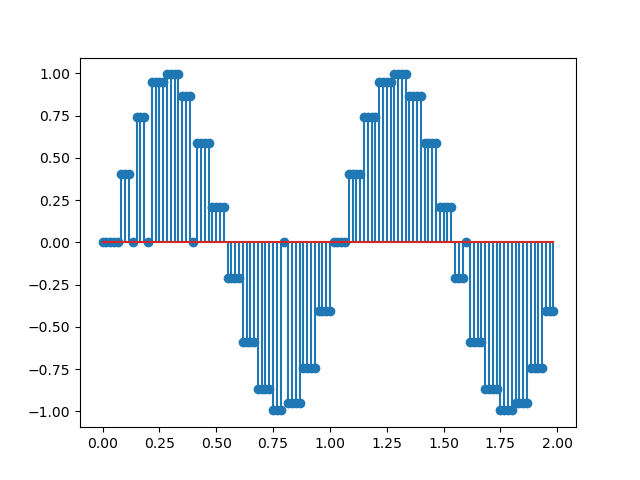

m: 120 - n: 30


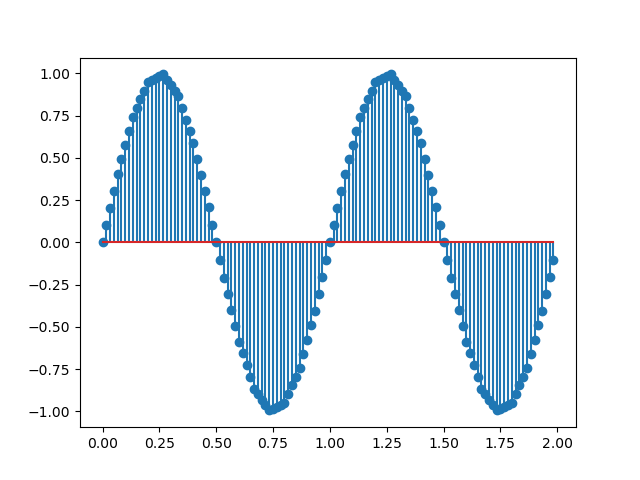

m: 120 - n: 30


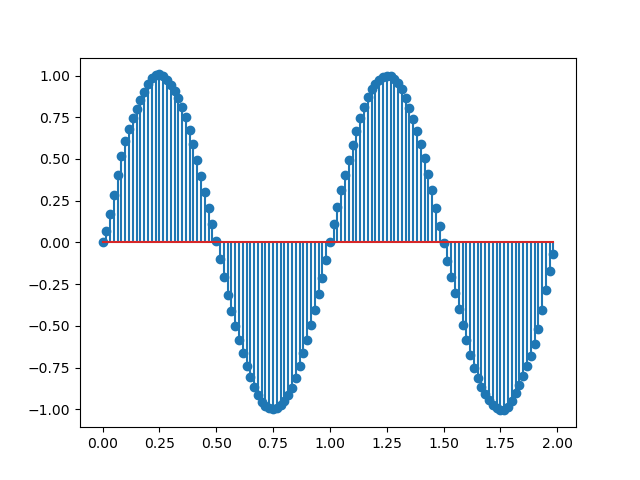

In [26]:
def interp_escalon(t):
  if t >= 1e-6 and t < 1:
    return 1
  else:
    return 0

def interp_sinc(t):
    x = 2*math.pi*0.5*t
    if np.abs(x)>1e-5:
      return np.sin(x) / x
    else:
      return 1

def interp_lineal(t):
  return (1 - np.abs(t) ) * (np.abs(t) < 1 ) 

def interpolacion (t, xvieja, Tviejo, factor, fmvieja, interpolador):
  fm_nueva = fmvieja*factor
  T_nuevo = 1 / fm_nueva
  tnuevo = np.arange(0,2,T_nuevo)
  
  m = len(tnuevo)
  n = len(xvieja)
  print('m:', m, '- n:', n)
  
  xnueva=np.zeros(m)
  if interpolador == 0:
    for M in range(m):
      suma = 0
      for N in range(n):
        t_aux = (tnuevo[M] - t[N])/Tviejo
        suma = suma + xvieja[N] * interp_escalon(t_aux)
      xnueva[M] = suma
      suma = 0
  elif interpolador == 1:
    for M in range(m):
      suma = 0
      for N in range(n):
        t_aux = (tnuevo[M] - t[N])/Tviejo
        suma = suma + xvieja[N] * interp_lineal(t_aux)
      xnueva[M] = suma
      suma = 0
  elif interpolador == 2:
      for M in range(m):
        suma = 0
        for N in range(n):
          t_aux = (tnuevo[M] - t[N])/Tviejo
          suma = suma + xvieja[N] * interp_sinc(t_aux)
        xnueva[M] = suma
        suma = 0

  return tnuevo, xnueva

fs_vieja = 15
factor = 4
plt.close('all')
sen1, t = senoidal (fs_vieja, 1, 0, 0, 2)
plt.figure('señal original'); plt.stem(t,sen1); plt.show()
t_int, x_int = interpolacion(t, sen1, 1/fs_vieja, factor, fs_vieja, 0)
plt.figure('interpolador escalón'); plt.stem(t_int,x_int); plt.show()
t_int, x_int = interpolacion(t, sen1, 1/fs_vieja, factor, fs_vieja, 1)
plt.figure('interpolador lineal'); plt.stem(t_int,x_int); plt.show()
t_int, x_int = interpolacion(t, sen1, 1/fs_vieja, factor, fs_vieja, 2)
plt.figure('interpolador sinc'); plt.stem(t_int,x_int); plt.show()

## Ejercicio 7

Genere distintas realizaciones de una señal aleatoria con distribucion gaussiana (distribucion normal, equivalentemente) con media cero y varianza unitaria, y luego utilice dichas realizaciones para vericar la estacionariedad y la ergodicidad. Para esto tenga en cuenta que los estimadores estadísticos (media y varianza, en este caso) requieren infinitas muestras y realizaciones para obtener el valor exacto, por lo tanto debería observarse si los estimadores tienden al mismo valor a medida que se incrementan la cantidad de muestras y realizaciones.

Ergodicidad: Un sistema es ergódico si su valor esperado (el promedio de muchos sistemas independientes realizando el experimento) es igual a su promedio a largo plazo (el promedio de un único sistema realizando el experimento repetidamente, manteniendo su estado de una muestra al siguiente)
Estacionariedad: El sistema es estacionario si los estadísticos no varían con respecto al tiempo

ERGODICIDAD:
Media de 3000 experimentos con distinta cantidad de muestras: 4.462338261127058e-05
Media de experimentos distintos del mismo sistema: 0.03237575050230094
Media de 3000 experimentos iguales repetidos: -0.0005230656542006245
ESTACIONARIEDAD: promedio de muestra 15 de todos los experimentos 0.009284798134492197 - promedio de muestra 25: 0.007167763414948569


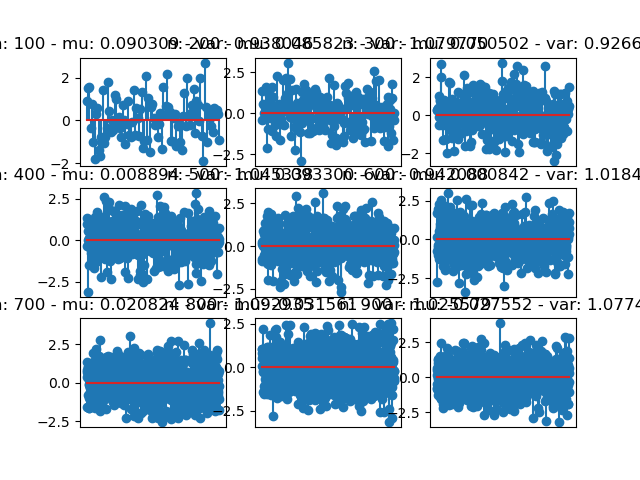

In [27]:
plt.close('all')

# Calculo la media
def media(x):
    return np.sum(x)/len(x)

def varianza(x):
  sum = 0
  m = media(x)
  for elemento in x:
    sum += (elemento - m) ** 2
  return sum / float(len(x))

mu = 0 # Media
sigma = 1 # Varianza
n = 1500

# Prueba 1: incrementar la cantidad de muestras
muestras = 500
n_experimentos = 3000
suma_mu_experimentos = 0

for t in range(n_experimentos):
        # Genero una señal aleatoria de distribución normal
        x_gauss = np.random.normal(mu, sigma, 800)
        t_gauss = np.arange(0,1,1/muestras)
        prom = media(x_gauss)
        suma_mu_experimentos = suma_mu_experimentos + prom
        # print('muestras: ',muestras,'- media:',prom)
        muestras = muestras + 500

print('ERGODICIDAD:')
print('Media de %i experimentos con distinta cantidad de muestras:' %n_experimentos, suma_mu_experimentos/n_experimentos)

# GRAFICOS

fig, axs = plt.subplots(3, 3)
muestras = 100
n_experimentos = 9
suma_mu_experimentos = 0
for row in range(3):
    for col in range(3):
        x_gauss = np.random.normal(mu, sigma, muestras)
        t_gauss = np.arange(0,1,1/muestras)
        axs[row, col].stem(t_gauss,x_gauss)
        prom = media(x_gauss)
        axs[row, col].title.set_text('n: %i' %muestras + ' - mu: %1.6f' %prom + ' - var: %1.6f' %np.var(x_gauss))
        axs[row, col].axes.get_xaxis().set_visible(False)
        muestras = muestras + 100
        suma_mu_experimentos = suma_mu_experimentos + prom
print('Media de experimentos distintos del mismo sistema:', suma_mu_experimentos/n_experimentos)

# Prueba 2: Se realizan muchas repeticiones con la misma cantidad de muestras

muestras = 500
n_experimentos = 3000
suma_mu_experimentos = 0
suma_senial_en_t_15 = 0
suma_senial_en_t_25 = 0 

for t in range(n_experimentos):
        x_gauss = np.random.normal(mu, sigma, 800)
        t_gauss = np.arange(0,1,1/muestras)
        prom = media(x_gauss)
        suma_mu_experimentos = suma_mu_experimentos + prom
        suma_senial_en_t_15 = suma_senial_en_t_15 + x_gauss[15]
        suma_senial_en_t_25 = suma_senial_en_t_25 + x_gauss[25]
print('Media de %i experimentos iguales repetidos:' %n_experimentos, suma_mu_experimentos/n_experimentos)
print('ESTACIONARIEDAD: promedio de muestra 15 de todos los experimentos',suma_senial_en_t_15/n_experimentos,'- promedio de muestra 25:', suma_senial_en_t_25/n_experimentos)

## Ejercicio 8
Genere una señal de ruido aleatorio, sumelo a una señal conocida y grafique el resultado. Calcule la potencia de la señal original, la potencia del
ruido generado, y calcule la relación señal-ruido (SNR, del ingles signal-tonoise-ratio). Luego multiplique la señal de ruido por una constante y vuelva a calcular la SNR. Por ultimo, a partir de las deficiones de potencia y SNR despeje y calcule el valor para dicha constante de manera que la SNR resultante sea de 0 dB.

Energía de una señal

$$ E_{tot} = \sum_{n = n_1}^{n_2} |x[n]|^2 $$

Potencia de una señal 
$$ P_{prom} = \frac{E_{tot}}{n_2 - n_1 +1} $$

Relacion Señal Ruido SNR

$$SNR = \frac{P_{señal}} {P_{ruido}} $$

Potencia de una señal multiplicada por una constante

$$ P_{prom} = \frac{E_{tot}}{n_2 - n_1 +1} \\

 = \frac{\sum_{n = n_1}^{n_2} |x[n]|^2}{n_2 - n_1 +1} $$

multiplico la señal por una constante c
$$  = \frac{\sum_{n = n_1}^{n_2} |C x[n]|^2}{n_2 - n_1 +1} 
= \frac{\sum_{n = n_1}^{n_2} C^2 | x[n]|^2}{n_2 - n_1 +1}
= \frac{C^2 \sum_{n = n_1}^{n_2} |x[n]|^2}{n_2 - n_1 +1}\\
$$

Es decir que la potencia promedio se convierte en
$$ P_{prom} = C^2 \frac{E_{tot}}{n_2 - n_1 +1} $$

Y la SNR para un ruido multiplicado por una constante entonces es
$$SNR = \frac{ P_{señal}} {C^2 P_{ruido}} $$

Para expresarlo en dB la expresion resultante queda:

$$SNR [dB] = 10 * log (\frac{ P_{señal}} {C^2 P_{ruido}} )$$

Para que la SNR sea 0 dB, se debe cumplir que: $$ 1 = \frac{ P_{señal}} {C^2 P_{ruido}} $$

Esto significa que: $$C = \sqrt{\frac{ P_{señal}} {P_{ruido}}} $$

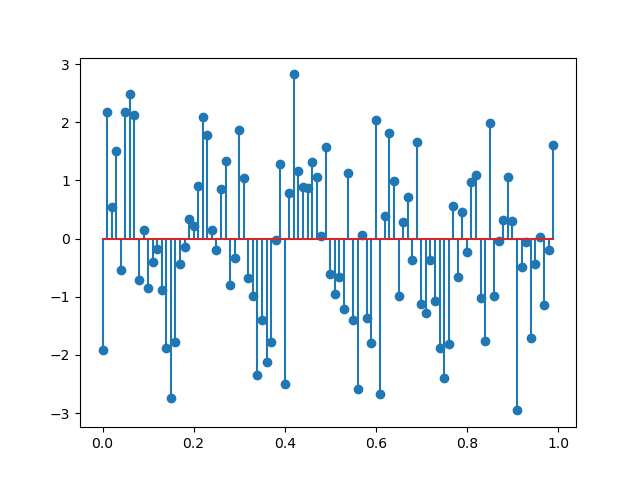

potencia de senoidal: 0.5000000000000002
potencia del ruido: 1.3008844696855908
Relacion señal ruido: -9.561915749832217
potencia del ruido multiplicado por constante: 0.5000000000000001
Relacion señal ruido al multiplicar por una constante: 2.2204460492503127e-15


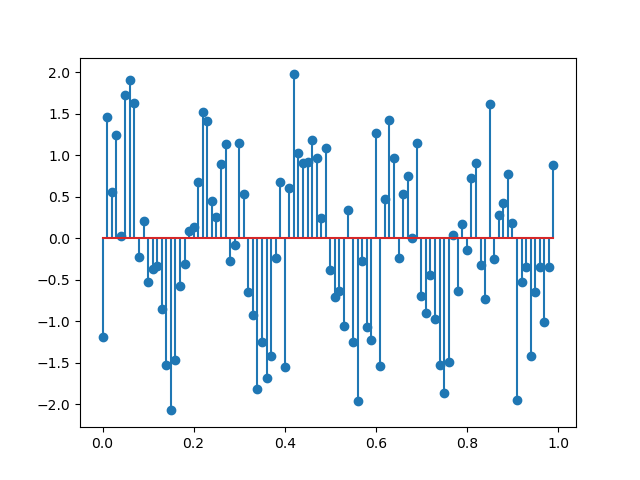

In [28]:
# Energía total de una señal
def energia(x):
    return sum(np.abs(x) ** 2)

def potencia(x):
    return energia(x)/len(x)

def SNR(pot_senial, pot_ruido):
    return 10*np.log(pot_senial/pot_ruido)

ruido = np.random.normal(mu, sigma, 100)
sen, t = senoidal (100, 5, 0, 0, 1)

suma = ruido + sen

plot(t,suma)
pot_senial = potencia(sen); pot_ruido = potencia(ruido); SNR_1 = SNR(pot_senial, pot_ruido)
print('potencia de senoidal:', pot_senial)
print('potencia del ruido:', pot_ruido)
print('Relacion señal ruido:', SNR_1)

# Multiplico el ruido por una constante y vuelvo a calcular SNR
C = np.sqrt(pot_senial/pot_ruido)
ruido_x_constante = C*ruido
pot_ruido = potencia(ruido_x_constante)
SNR_2 = SNR(pot_senial, pot_ruido)
print('potencia del ruido multiplicado por constante:', pot_ruido)
print('Relacion señal ruido al multiplicar por una constante:', SNR_2)

suma_2 = ruido_x_constante + sen
plot(t,suma_2)